# Ford GoBike
## by Alphonse Emmanuel Y Boudouin

## Investigation Overview

### This presentation is to show the relevant findings i made during the exploratory part of my dataset. I will  display three plots i made about the relationship between the duration in min and others features and also the plot about the relationship between  top10 destination , user type and period of the day. 

## Dataset Overview

### The Ford GoBike dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. In our dataset, we have features such as the start and the end sation name and id, the start time, the user type(if the user is a subscriber or a customer) , the gender and the birth year of the member, also information about the latitude and longitude of the start and end station id, bike id, the ride duration and the bike_share_for_all_trip feauture. These are the features in the dataset. My goal was to see the relationship between some of these features and also their impact on the duration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('201902-fordgobike-tripdata_cleaned.csv')

In [3]:
quartiles = np.percentile(df['duration_min'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74* (quartiles[2] - quartiles[0])
sig

5.8089999999999993

In [4]:
df_dff = df.query('(duration_min > @mu - 5 * @sig) & (duration_min < @mu + 5 * @sig)')

In [5]:
top_end = df['end_station_name'].value_counts().index[:10]

In [6]:
top_end_df = df.loc[df['end_station_name'].isin(top_end)]

## Relationship between the user_type, start_day and the duration in min
### Here, i wanted to know the relationship between these three features. I was curious to know which type of user had the highest duration based on the week day. And as we can see, for subscribers, saturday has the highest duration and monday with the low one. But for customers, it was sunday with the highest duration in min and wednesday with the lowest one. I saw that subsribers mostly ride durin the week days than the weekend, but for customers is was mostly the same for all the week. We can say that subscribers are surely people with some activities, but customers are maybe tourists

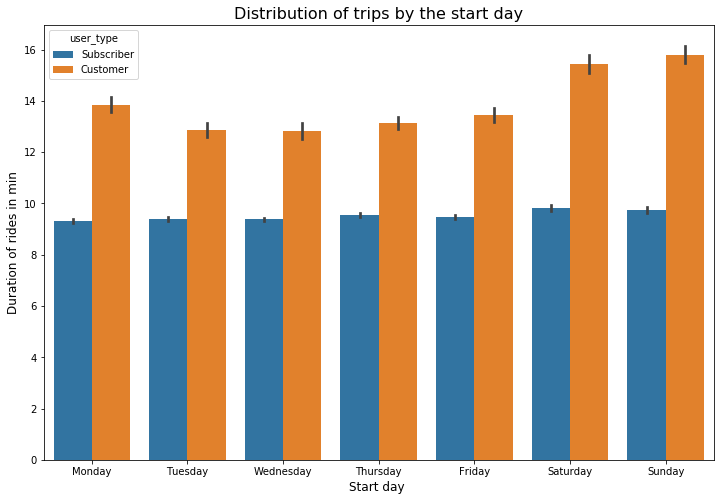

In [7]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_dff['start_day'] = df_dff['start_day'].astype(weekdaycat)

plt.figure(figsize=(12, 8))
sb.barplot(data=df_dff, x='start_day', y='duration_min', hue='user_type')
plt.xlabel('Start day ', fontsize=12)
plt.ylabel('Duration of rides in min', fontsize=12)
plt.title("Distribution of trips by the start day", fontsize=16);

## Relationship between the period of the day, the user type and the duration
### I would be very intersting to also knwo how the two type of user spend on riding per period on the day. And with the plot below, we clearly see that the most of the high duration in min happened during the afternoon and then the morning and the night, for both. It's not that easy to ride a bike in the night w, so it's understandable

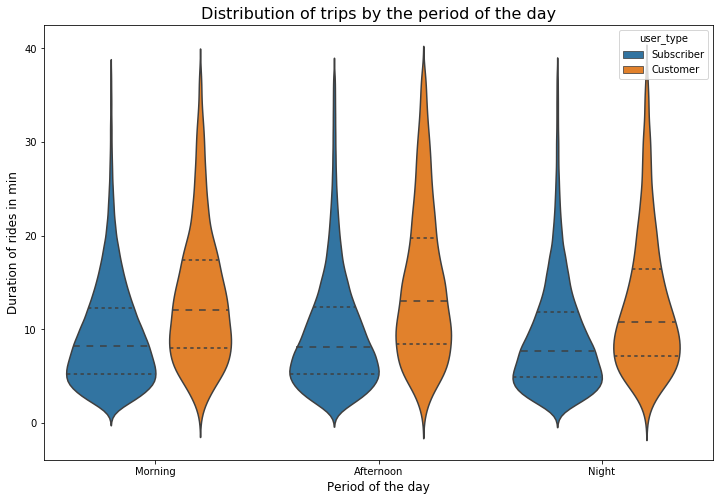

In [8]:
periodday = ['Morning', 'Afternoon', 'Night']
perioddaycat = pd.api.types.CategoricalDtype(ordered=True, categories=periodday)
df_dff['day_period'] = df_dff['day_period'].astype(perioddaycat)

plt.figure(figsize=(12, 8))
sb.violinplot(data=df_dff, x='day_period', y='duration_min',inner='quartile', hue='user_type')
plt.xlabel('Period of the day', fontsize=12)
plt.ylabel('Duration of rides in min', fontsize=12)
plt.title("Distribution of trips by the period of the day", fontsize=16);

## Relationship between the user type, the starting hour and the duration in min
### Here, we can see that customer had highest duration in min per hour than subscribers, but for both of them, from 6 am, we can see that there was a kind of positive inscrease of duration. 


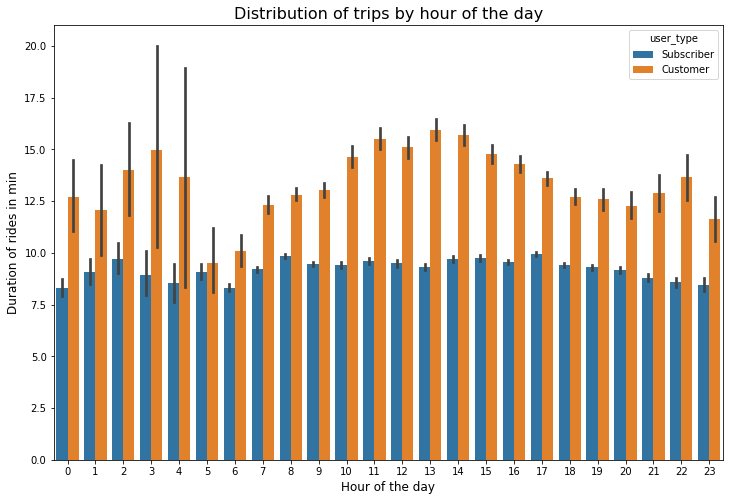

In [9]:
plt.figure(figsize=(12, 8))
sb.barplot(data=df_dff, x='start_hour', y='duration_min', hue='user_type')
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Duration of rides in min', fontsize=12)
plt.title("Distribution of trips by hour of the day", fontsize=16);

## Relationship between top10 destinations, user type and the period of the day
### In these plots, we can clearly see that for both customers and subscribers, afternoon is the period of the day with the highest count, then we have morning and then  night

Text(0,0.5,'End Station Name')

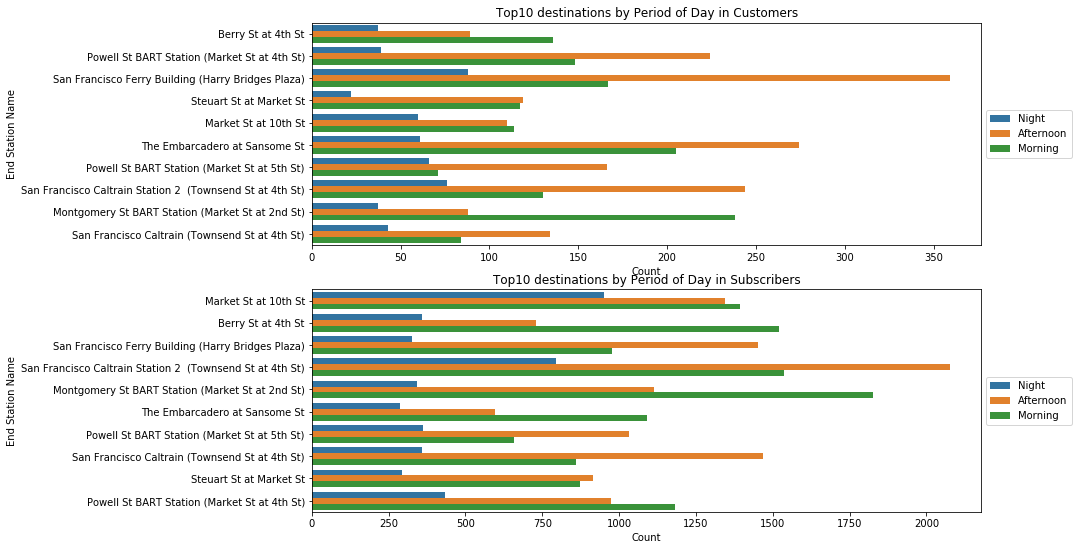

In [10]:
top_endcus = top_end_df.query('user_type == "Customer"')
top_endsub = top_end_df.query('user_type == "Subscriber"')
plt.figure(figsize=(12,9))
plt.subplot(2, 1, 1)
ax = plt.subplot(2,1,1)
sb.countplot(data=top_endcus, y='end_station_name', hue='day_period')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top10 destinations by Period of Day in Customers')
plt.xlabel('Count')
plt.ylabel('End Station Name')


ax=plt.subplot(2, 1, 2)
sb.countplot(data=top_endsub, y='end_station_name', hue='day_period')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top10 destinations by Period of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('End Station Name')

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 490759 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 